# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem ), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

## 1.) Is the distribution of body temperatures normal?

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')
sns.set()

print(df['temperature'].describe())

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64


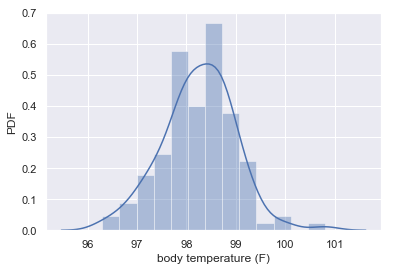

In [4]:
# Turn df['temperature'] into a numpy array
temp = df['temperature'].values

#plt.hist(temp, bins=15, normed=True)
sns.distplot(temp)
plt.xlabel('body temperature (F)')
plt.ylabel('PDF')
plt.show()

Histogram seems to follow the normal distribution curve.

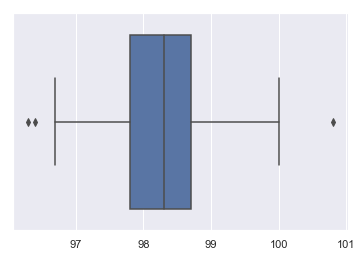

In [5]:
sns.boxplot(temp)
plt.show()

With the boxplot, we can see there are a few outliers.

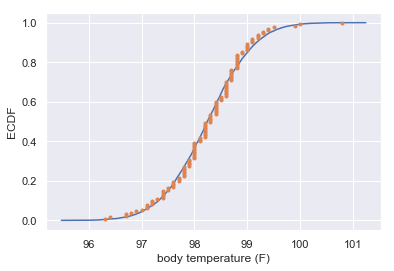

In [6]:
mean = np.mean(temp)
std = np.std(temp)
samples = np.random.normal(mean, std, 10000)
x, y = ecdf(temp)
x_theor, y_theor = ecdf(samples)

plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('body temperature (F)')
plt.ylabel('ECDF')
plt.show()

The ECDFs of the sample data vs the resampled data seem to be almost identical.

Based on the above graphs, the distribution seems to be normal.

To statistically test for normality, we first state our **null hypothesis** to be *we assume the distribution of body temperatures to be normal* & our **significance level** to be *0.05*.

In [7]:
stats.normaltest(temp)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

The p-value is greater than our significance level, so we fail to reject the null hypothesis. The distribution is normal.

## 2.) Is the sample size large? Are the observations independent?

* **Randomization** There is no indication that the collected sample is not random, so we assume randomization.
    
* **Independence Assumption** One's body temperature should have no effect on another's. Independence is assumed.
    
* **10% Rule** There are only 130 entries in this dataset, which is undoubtedly less than 10% of the entire human population.

* **Large Enough Sample** Our sample population (130) is greater than 30. We can take sample sizes of at least 30 to ensure our samples will be large enough.

## 3.) Is the true population mean really 98.6 degrees F?

* **Null hypothesis:** The true population mean is 98.6 degrees F
* **Significance level:** 0.05

**One or two sample?**

Since we are only using one dataset, we should use a one sample test.

**t or z test?**

The general rule of thumb to determine which test to use is by looking at the sample size of the data and whether the population parameters are known. Although the sample size is greater than 30, we do not know the population standard deviation, therefore a t-test should be used.

### Bootstrap hypothesis test

In [8]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, size=len(data))
    
    return func(bs_sample)


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

/Users/vwu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


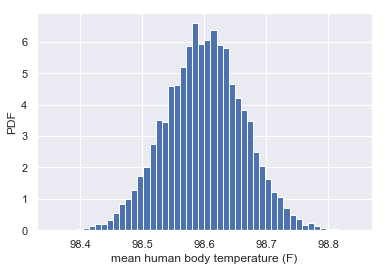

95% confidence interval:  [98.47384615 98.72461538] 
p-value:  0.0


In [9]:
wunderlich_mean = 98.6

# Shift 'temp' so mean will be 98.6
shifted = temp - np.mean(temp) + wunderlich_mean

# Create 10,000 bootstrap replicates of the mean of the shifted data
bs_replicates_shifted = draw_bs_reps(shifted, np.mean, 10000)

plt.hist(bs_replicates_shifted, bins=50, normed=True)
plt.xlabel('mean human body temperature (F)')
plt.ylabel('PDF')
plt.show()

# Construct confidence intervals
conf_int = np.percentile(bs_replicates_shifted, [2.5, 97.5])

# Compute p-value
p = np.sum(bs_replicates_shifted <= np.mean(temp)) / 10000
print('95% confidence interval: ', conf_int, '\np-value: ', p)

As can be seen, the p-value obtained is less than our defined significance level (0.05), so we reject the null hypothesis that the true population mean is 98.6

### Frequentist statistical testing

In [10]:
# Get t-score and p-value
t, t_pval = stats.ttest_1samp(temp, popmean=wunderlich_mean)
print('t-score: ', t, '\np-value: ', t_pval)

# Get z-score and p-value
z = (np.mean(temp) - wunderlich_mean) / (np.std(temp) / np.sqrt(len(temp)))
z_pval = stats.norm.sf(abs(z)) * 2
print('\nz-score: ', z, '\np-value: ', z_pval)

t-score:  -5.4548232923645195 
p-value:  2.4106320415561276e-07

z-score:  -5.4759252020785585 
p-value:  4.3523151658713056e-08


We use a two tailed test for both t- and z-test, but the t-test p-value is nearly double the p-value obtained from the z-test. This could be due to the fact that the tails of the t-test's distribution are fatter. Regardless, the computed p-values are smaller than our significance level, so we reject the null hypothesis with the frequentist approach as well.

## 4.) Draw a small sample of size 10 from the data and repeat both frequentist tests.

The sample size is <30 and population mean/standard deviation are unknown, therefore the t-test would be the better test to utilize.

In [11]:
# Get random sample of 10
sample_10 = np.random.choice(temp, size=10)

# Perform t and z test again with sample of 10
tval_10, pval_10 = stats.ttest_1samp(sample_10, popmean=wunderlich_mean)
z_10 = (np.mean(sample_10) - wunderlich_mean) / (np.std(sample_10) / np.sqrt(10))
z_pval_10 = stats.norm.sf(abs(z_10)) * 2

print('t-score (10 samples): ', tval_10, '\np-value (10 samples): ', pval_10)
print('\nz-score (10 samples): ', z_10, '\np-value (10 samples): ', z_pval_10)

t-score (10 samples):  -2.5310875016259 
p-value (10 samples):  0.03217790390332739

z-score (10 samples):  -2.6680004874409935 
p-value (10 samples):  0.007630414739244939


The p-values are much bigger than the p-values in the previous test. The p-value (0.02) obtained from the t-test is smaller than the significance level, so we (still) reject the null hypothesis.

While both p-values are smaller than our significance level, meaning we (still) reject the null hypothesis, the t-test's p-value is a lot bigger than z-test's. T-tests are done when sample sizes are small, which could explain why the t-test's distribution has fatter tails. As the sample size gets larger, the t-distribution approaches the normal distribution.

## 5.) At what temperature should we consider someone's temperature to be "abnormal"?

### Bootstrap hypothesis test

In [12]:
# Create 10,000 bootstrap replicates of the mean of the shifted data
bs_replicates = draw_bs_reps(temp, np.mean, 10000)

conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval: ', conf_int)

95% confidence interval:  [98.12692308 98.37461538]


In [13]:
# Z-score associated with 95% confidence level: 1.96
# Margin of error = critical value * standard error (or standard deviation, if known)
margin_error = 1.96 * np.std(temp) / np.sqrt(len(temp))
print('Margin of error: ', margin_error)

Margin of error:  0.12555096480257902


Any value outside the range [98.12, 98.37] (lower than 98.12 or greater than 98.37) will be considered abnormal.

### Frequentist statistical testing

In [14]:
sample = np.random.choice(temp, size=10)
error = np.std(sample) / np.sqrt(10)

# t-test
# critical value associated with 95% confidence is 2.262
distance = 2.262 * error

print('t-test confidence interval: [', np.mean(sample)-distance, ',', np.mean(sample)+distance, ']')

# z-test (only t-test should be done due to sample size, but included for academic purpose)
# critical value associated with 95% confidence is 1.96
distance2 = 1.96 * error

print('z-test confidence interval: [', np.mean(sample)-distance2, ',', np.mean(sample)+distance2, ']')

t-test confidence interval: [ 97.19085572836205 , 98.26914427163793 ]
z-test confidence interval: [ 97.26283697064086 , 98.19716302935912 ]


According to the above confidence interval constructed using a t-distribution, any value smaller than 97.8 or greater than 98.54 will be considered abnormal.

## 6.) Is there a significant difference between males and females in normal temperature?

* **Null hypothesis:** There is no significant difference between males and females in body temperature
* **Significance level:** 0.05

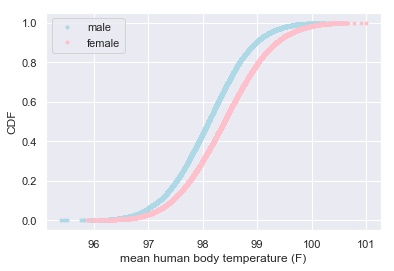

Male mean temp:  98.10461538461537 
Female mean temp:  98.39384615384614

Male median temp:  98.1 
Female median temp:  98.4

Male temp standard deviation:  0.6933598841828699 
Female temp standard deviation:  0.7377464486428966


In [15]:
# Store male and female body temperatures into 2 separate arrays
male = df['temperature'][df['gender'] == 'M'].values
female = df['temperature'][df['gender'] == 'F'].values

# Computing statistics for each gender's body temperature
m_mean = np.mean(male)
m_median = np.median(male)
m_std = np.std(male)
f_mean = np.mean(female)
f_median = np.median(female)
f_std = np.std(female)

# Draw 10,000 random samples 
m_samples = np.random.normal(m_mean, m_std, 10000)
f_samples = np.random.normal(f_mean, f_std, 10000)
x_m, y_m = ecdf(m_samples)
x_f, y_f = ecdf(f_samples)

plt.plot(x_m, y_m, marker='.', linestyle='none', color='lightblue')
plt.plot(x_f, y_f, marker='.', linestyle='none', color='pink')
plt.xlabel('mean human body temperature (F)')
plt.ylabel('CDF')
plt.legend(('male', 'female'))
plt.show()

print('Male mean temp: ', m_mean, '\nFemale mean temp: ', f_mean)
print('\nMale median temp: ', m_median, '\nFemale median temp: ', f_median)
print('\nMale temp standard deviation: ', m_std, '\nFemale temp standard deviation: ', f_std)

In [16]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two datasets"""
    
    #Concatenate the datasets
    data = np.concatenate((data1, data2))
    
    #Permute the concatenated array
    perm_data = np.random.permutation(data)
    
    #Split the permuted aray into two
    perm_sample_1 = perm_data[:len(data1)]
    perm_sample_2 = perm_data[len(data1):]
    
    return perm_sample_1, perm_sample_2


def draw_perm_reps(data1, data2, func, size=1):
    """Generate multiple permutation replicates"""
    
    # Initialize array of replicates
    perm_replicates = np.empty(size)
    
    for i in range (size):
        #Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data1, data2)
        #Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates


def diff(data1, data2):
    """Difference in means of two arrays"""
    
    return np.mean(data1) - np.mean(data2)

In [17]:
# Gender mean difference
mf_diff = abs(np.mean(male) - np.mean(female))

# Draw 10,000 permutation replicates
perm_reps = draw_perm_reps(male, female, diff, 10000)

# Compute p-value 
p = np.sum(perm_reps >= mf_diff) / len(perm_reps)
print('p-value: ', p)

p-value:  0.0119


To test our null hypothesis, a permutation test is performed. In a permutation test, we combine two datasets, permute the data, and re-split the data into the two datasets. We then compute the p-value to determine whether the permutation samples have a difference more extreme than the difference of the sample data.

Based on our result, the p-value (0.01) is smaller than the significance level, so we reject the null hypothesis. It is likely that there is a significant difference between male and female body temperatures.

### Conclusion

For many years, it was believed that the mean normal body temperature was 98.6$^{\circ}$F. We performed multiple tests to determine the validity of the claim.

We set the null hypothesis to be 'the true normal body temperature is indeed 98.6$^{\circ}$F'. After testing, it seems that regardless of approach (bootstapping vs frequentist), there is not enough evidence to support Wunderlich's claim.

We then test to see if there is a significant mean body temperature difference between males and females. Using the provided sample's data, the difference in mean body temperature between men and women is about 0.29$^{\circ}$F. We resample the data to find the probability of getting a difference as (or more) extreme, and as it turns out, we get a p-value of 0.01, which is smaller than our significance level (0.05). With that, we conclude there is indeed a significant difference in mean body temperatures between males and females.

Little is known about Wunderlich's sample population. Certain factors may affect body temperature, such as age and perhaps race. Regardless, we refute Wunderlich's claim. The mean human body temperature is not 98.6$^{\circ}$F.